In [2]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
source_file = 'C:\\Users\\pc\\Downloads\\diabetes\\diabetes-data\\Diabetes-Data\\data*'

In [4]:
file_lis = glob.glob(source_file)

In [5]:
file_comp = []
for file in file_lis :
    temp = pd.read_csv(file, delimiter = '\t', header = None)
    expected_col = 4
    actual_col = len(temp.columns)
    if expected_col < actual_col:
        for col in range(actual_col,expected_col):
            file.drop(subset = col)
    file_comp.append(temp)
file_comp = file_comp[:-1]
df = pd.concat(file_comp)

In [6]:
df.columns = ['date','time','code','value']

In [7]:
input_df = df.copy()

In [8]:
year = pd.to_datetime(input_df['date'],dayfirst = False, yearfirst =False, errors = 'coerce').dt.year

In [9]:
train_df = input_df[year<1991]
val_test_df = input_df[year == 1991]

In [10]:
from sklearn.model_selection import train_test_split
val_df, test_df = train_test_split(val_test_df, test_size = 0.5, random_state = 42)

In [11]:
input_df,train_df,val_df,test_df.dropna(inplace =True)

(           date   time  code value
 0    04-21-1991   9:09    58   100
 1    04-21-1991   9:09    33     9
 2    04-21-1991   9:09    34    13
 3    04-21-1991  17:08    62   119
 4    04-21-1991  17:08    33     7
 ..          ...    ...   ...   ...
 336  05-09-1989  08:00    33   1.0
 337  05-09-1989  08:00    34   7.0
 338  05-10-1989  08:00    34   7.0
 339  05-11-1989  08:00    34   7.0
 340  05-12-1989  08:00    34   7.0
 
 [29330 rows x 4 columns],
            date   time  code value
 0    10-10-1989  08:00    58   149
 1    10-10-1989  08:00    33   010
 2    10-10-1989  12:00    60   116
 3    10-10-1989  12:00    33   004
 4    10-10-1989  18:00    62   304
 ..          ...    ...   ...   ...
 336  05-09-1989  08:00    33   1.0
 337  05-09-1989  08:00    34   7.0
 338  05-10-1989  08:00    34   7.0
 339  05-11-1989  08:00    34   7.0
 340  05-12-1989  08:00    34   7.0
 
 [16810 rows x 4 columns],
            date   time  code value
 234  05-28-1991  16:52    34     2
 90   

In [12]:
input_df['value'] = pd.to_numeric(input_df['value'], errors = 'coerce')
train_df['value'] = pd.to_numeric(train_df['value'], errors = 'coerce')
val_df['value'] = pd.to_numeric(val_df['value'], errors = 'coerce')
test_df['value'] = pd.to_numeric(test_df['value'], errors = 'coerce')

C:\Users\pc\AppData\Local\Temp\ipykernel_7232\3698523974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['value'] = pd.to_numeric(train_df['value'], errors = 'coerce')


In [13]:
input_df.dropna(subset = 'value',inplace = True)
train_df.dropna(subset = 'value',inplace = True)
val_df.dropna(subset = 'value',inplace = True)
test_df.dropna(subset = 'value',inplace = True)

C:\Users\pc\AppData\Local\Temp\ipykernel_7232\4065386151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(subset = 'value',inplace = True)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(input_df[['value']])
train_df['value'] = scaler.transform(train_df[['value']])
val_df['value'] = scaler.transform(val_df[['value']])
test_df['value'] = scaler.transform(test_df[['value']])

C:\Users\pc\AppData\Local\Temp\ipykernel_7232\442297274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['value'] = scaler.transform(train_df[['value']])


In [15]:
#cyclical_encoding
input_df['hour_sin'] = np.sin(2*np.pi* (pd.to_datetime(input_df['time'],errors = 'coerce').dt.hour)/24)
input_df['hour_cos'] = np.cos(2*np.pi* (pd.to_datetime(input_df['time'],errors = 'coerce').dt.hour)/24)
input_df.dropna(subset = ['hour_sin','hour_cos'],inplace = True)
train_df['hour_sin'] = np.sin(2*np.pi* (pd.to_datetime(train_df['time'],errors = 'coerce').dt.hour)/24)
train_df['hour_cos'] = np.cos(2*np.pi* (pd.to_datetime(train_df['time'],errors = 'coerce').dt.hour)/24)
train_df.dropna(subset = ['hour_sin','hour_cos'],inplace = True)
val_df['hour_sin'] = np.sin(2*np.pi* (pd.to_datetime(val_df['time'],errors = 'coerce').dt.hour)/24)
val_df['hour_cos'] = np.cos(2*np.pi* (pd.to_datetime(val_df['time'],errors = 'coerce').dt.hour)/24)
val_df.dropna(subset = ['hour_sin','hour_cos'],inplace = True)
test_df['hour_sin'] = np.sin(2*np.pi* (pd.to_datetime(test_df['time'],errors = 'coerce').dt.hour)/24)
test_df['hour_cos'] = np.cos(2*np.pi* (pd.to_datetime(test_df['time'],errors = 'coerce').dt.hour)/24)
test_df.dropna(subset = ['hour_sin','hour_cos'],inplace =True)

C:\Users\pc\AppData\Local\Temp\ipykernel_7232\2556844944.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  input_df['hour_sin'] = np.sin(2*np.pi* (pd.to_datetime(input_df['time'],errors = 'coerce').dt.hour)/24)
C:\Users\pc\AppData\Local\Temp\ipykernel_7232\2556844944.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  input_df['hour_cos'] = np.cos(2*np.pi* (pd.to_datetime(input_df['time'],errors = 'coerce').dt.hour)/24)
C:\Users\pc\AppData\Local\Temp\ipykernel_7232\2556844944.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['hour_sin'] = np.sin(2*np.pi* (pd.to

In [16]:
X_train = train_df[['value','hour_sin','hour_cos']]
X_val = val_df[['value','hour_sin','hour_cos']]
X_test = test_df[['value','hour_sin','hour_cos']]

train_targets = train_df['code'].copy()
val_targets = val_df['code'].copy()
test_targets = test_df['code'].copy()

target_df = pd.DataFrame(pd.concat([train_targets,val_targets,test_targets]))

In [17]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(target_df)

C:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [18]:
def min_samples (a,b,train,targets,test,test_targets):
    lis1 = []
    lis2 = []
    max_split = list(range(a,b))
    for i in range (a,b) :
        model_p = RandomForestClassifier(max_depth=None,
                                         n_jobs = -1,
                                         n_estimators = 500,
                                         min_samples_split= i,
                                         random_state = 43).fit(train,targets)
        accuracy_test= model_p.score(test,test_targets)
        accuracy_train = model_p.score(train,targets)
        lis1.append(accuracy_test)
        lis2.append(accuracy_train)
    sns.lineplot(y = lis1,
                 x = max_split)
    plt.plot(max_split,lis2)
    return (lis1, lis2, max_split)

([0.7318480525725276,
  0.7321686167655073,
  0.7372976438531816,
  0.7400224394935085,
  0.7430677993268152,
  0.7451514665811829,
  0.7499599294758775,
  0.753165571405674,
  0.7542875460811027,
  0.7552492386600417,
  0.7565314954319603,
  0.7530052893091842,
  0.7555698028530213,
  0.7598974194582465,
  0.7603782657477159,
  0.762141368809104,
  0.7690334989581664,
  0.7680718063792275],
 [0.8711755233494364,
  0.8701616270054273,
  0.8664638873978648,
  0.86348183932725,
  0.8606787141408719,
  0.8582334347229678,
  0.8554303095365897,
  0.8535814397328085,
  0.8511361603149042,
  0.8507783145464305,
  0.8495258543567722,
  0.8478559074372279,
  0.8468420110932188,
  0.8462456014790959,
  0.845291346096499,
  0.8447545774437883,
  0.8438003220611916,
  0.8437406810997793],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

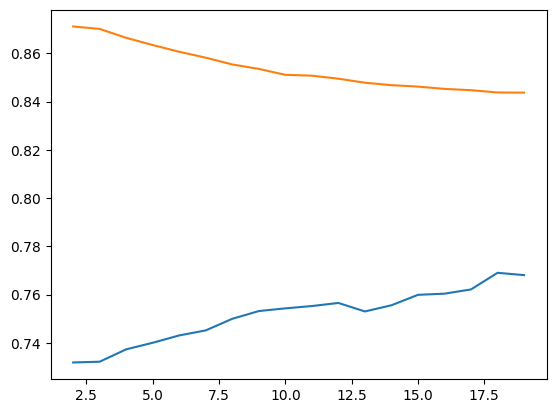

In [19]:
min_samples(2,20,X_train,train_targets,X_val, val_targets)

In [20]:
def min_samples (a,b,train,targets,test,test_targets):
    lis1 = []
    lis2 = []
    max_leaf = list(range(a,b))
    for i in range (a,b) :
        model_p = RandomForestClassifier(max_depth=None,
                                         n_jobs = -1,
                                         n_estimators = 500,
                                         min_samples_leaf= i,
                                         random_state = 43).fit(train,targets)
        accuracy_test= model_p.score(test,test_targets)
        accuracy_train = model_p.score(train,targets)
        lis1.append(accuracy_test)
        lis2.append(accuracy_train)
    sns.lineplot(y = lis1,
                 x = max_leaf)
    plt.plot(max_leaf,lis2)
    return (lis1, lis2, max_leaf)

([0.748677672703959,
  0.7606988299406956,
  0.7578137522038788,
  0.7565314954319603,
  0.7568520596249398,
  0.7685526526686969,
  0.7632633434845327,
  0.7647058823529411,
  0.7634236255810226,
  0.7637441897740023,
  0.7626222150985735,
  0.7632633434845327,
  0.7632633434845327,
  0.7677512421862478,
  0.7688732168616765,
  0.7669498317037987,
  0.7655072928353903,
  0.7667895496073088],
 [0.8581737937615554,
  0.8482137532057017,
  0.8436213991769548,
  0.8407586330291644,
  0.8387308403411463,
  0.8372398163058389,
  0.8356295103477068,
  0.8341981272738117,
  0.8329456670841534,
  0.8301425418977754,
  0.8295461322836524,
  0.8282340311325819,
  0.8277569034412835,
  0.8270412119043359,
  0.8271604938271605,
  0.8271604938271605,
  0.8256694697918531,
  0.8253712649847915],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

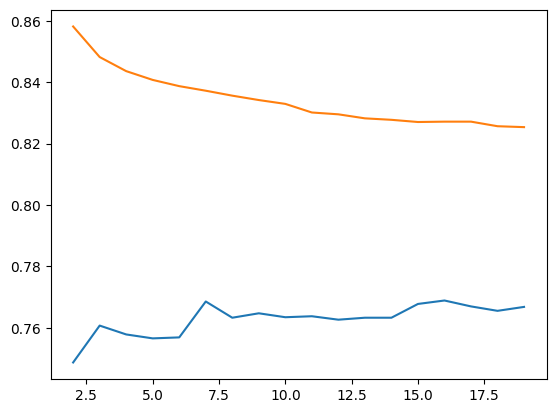

In [21]:
min_samples(2,20,X_train,train_targets,X_val, val_targets)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs = -1,
                               n_estimators = 1000,
                               max_depth=None,
                               min_samples_split=16,
                               min_samples_leaf=17,
                               min_weight_fraction_leaf=0.0,
                               max_features='sqrt',
                               max_leaf_nodes=None,
                               random_state = 42,
                               bootstrap = True)
model.fit(X_train,train_targets)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,16
,min_samples_leaf,17
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
model.score(X_val, val_targets)

0.7672703958967784